# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Data acquisition

In [2]:
data_path = Path('.') / 'data'
filenames = {
    'x_train': 'AMF_train_X_XCZw8r3.csv',
    'y_train': 'AMF_train_Y_omYQJZL.csv',
    'x_test':'AMF_test_X_uDs0jHH.csv',
}

In [3]:
x_train = pd.read_csv(data_path / filenames['x_train'])
y_train = pd.read_csv(data_path / filenames['y_train'])
x_test = pd.read_csv(data_path / filenames['x_test'])

In [4]:
with pd.option_context('display.max_columns', None):
    display(x_train)

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,10.722543,984.320560,23151.83800,25139.59800,682.153260,8272.770569,682.153260,984.32056,682.15326,23151.83800,23151.8380,23151.8380,1,7,2.750000,351.702399,9639.216031,1585.079495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,0.000204,8.768699,2671.48830,31278.35700,11.866026,3796.632686,11.866026,177.93991,73.74323,808.26230,21433.6840,21433.6840,1,17,5.933333,0.000066,493.559196,0.000901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,0.000129,5.725427,448.88360,30799.46700,2.761036,1397.103679,2.761036,187.99548,19.77734,418.23984,1953.6235,10842.4640,1,20,5.063492,0.000018,163.954785,0.000770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,0.000945,62.444176,19187.71900,19187.71900,286.019320,9736.869034,286.019320,286.01932,286.01932,19187.71900,19187.7190,19187.7190,1,8,4.250000,0.000148,1232.562133,0.004301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,0.000146,2.225420,273.45676,23164.51400,2.798452,10066.803992,2.798452,1345.95280,662.57434,21903.78300,23164.5140,23164.5140,1,19,3.710526,0.000025,248.073927,0.001364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,105778,Isin_84,Date_27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,0.000188,0.000039,0.003226,1228.04750,7609.94340,7609.944300,7609.944336,7609.944300,7609.94430,7609.94430,7609.94430,7609.9443,7609.9443,1,15,6.666667,0.001000,927.968000,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
105778,105779,Isin_102,Date_18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,0.000963,0.000176,70.822190,307.08710,392.75638,567.153000,567.153015,567.153000,567.15300,567.15300,567.15300,567.1530,567.1530,1,4,2.428571,0.001000,143.065500,0.569000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
105779,105780,Isin_12,Date_13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,0.000578,0.000062,1.023857,4.95412,23448.52500,23448.525000,23448.525391,23448.525000,23448.52500,23448.52500,23448.52500,23448.5250,23448.5250,1,21,4.687500,0.001000,1157.596000,2.488000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
105780,105781,Isin_27,Date_30,Trader_60,1.179191,204.000000,NaN,0.0,384.893976,0.000000,0.000536,0.000242,1.288446,119.05335,19157.80900,19157.809000,19157.808594,19157.809000,19157.80900,19157.80900,19157.80900,19157.8090,19157.8090,1,30,4.942857,0.001000,435.646015,1.001000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35


In [5]:
y_train

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT
...,...,...
81,Trader_140,MIX
82,Trader_451,MIX
83,Trader_438,MIX
84,Trader_278,HFT


# Exploration

In [6]:
with pd.option_context('display.max_columns', None):
    display(x_train.describe(include='all'))

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
count,105782.000000,105782,105782,105782,104099.000000,105782.000000,58170.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,101547.000000,101547.000000,101547.000000,80606.000000,80606.000000,80606.000000,80527.000000,80527.000000,80527.000000,80634.000000,80634.000000,80634.000000,105782.000000
unique,NaN,119,22,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Isin_102,Date_7,Trader_209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1368,5034,10208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52891.500000,NaN,NaN,NaN,34.435038,17.458787,164.469153,87.472164,2772.513578,103.310102,1011.630575,228.659560,4734.942457,9786.032539,24292.035085,1945.038027,5616.519744,2070.233540,4445.109364,2707.080480,8451.108964,11587.949910,19980.278762,5.563896,25.249324,2.093446,438.447418,1082.427774,651.743386,297.616104,598.637740,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,334.034070
std,30536.777425,NaN,NaN,NaN,137.261154,71.843225,929.010848,1549.972501,4985.149536,1617.051421,4967.426924,2319.866837,10431.964706,14256.357615,17772.438572,6672.112738,9140.189971,6809.714060,9372.947978,7531.875480,13270.509124,15667.418368,17654.559859,4.385260,35.264111,1.417188,2876.755745,3187.357171,2931.984342,1882.353978,2010.296401,1896.835552,1922.648030,2031.797111,1933.073024,1910.028651,2037.041672,1923.023720,644.816702
min,1.000000,NaN,NaN,NaN,1.044444,2.000000,1.001960,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000065,0.000007,0.000038,0.000016,0.000035,0.000028,0.000038,0.000038,0.000038,1.000000,1.000000,1.000000,0.000001,0.000001,0.000001,0.000001,0.000002,0.000001,0.000001,0.000003,0.000002,0.000001,0.000008,0.000003,1.000000
25%,26446.250000,NaN,NaN,NaN,3.709023,2.753802,3.253655,0.000000,69.365666,0.000000,1.243868,0.000024,22.249021,117.771340,4410.907350,0.000583,67.897392,0.043414,6.234451,0.746623,30.724017,109.431107,1902.260450,2.000000,6.000000,1.500000,0.000007,50.921032,4.915512,0.000005,33.819189,2.533583,0.000006,32.699571,2.305276,0.000020,33.713187,2.639113,24.000000
50%,52891.500000,NaN,NaN,NaN,7.346154,4.789474,14.000000,0.000000,262.325253,0.000109,10.154920,0.093957,114.957445,480.715195,30166.389500,0.044144,272.333702,1.663752,35.734245,8.251923,182.259375,596.792220,17972.680000,5.000000,14.000000,1.880000,0.000091,183.022816,36.457000,0.000232,110.427370,22.413161,0.000260,111.633327,23.665962,0.000270,113.158721,23.435835,97.000000
75%,79336.750000,NaN,NaN,NaN,22.707956,16.366667,73.689116,0.000000,3801.273320,0.020739,60.552090,2.836749,2277.450350,20975.263250,37485.990000,35.497842,9185.177948,69.218030,2075.455025,254.888130,16302.060250,23952.383000,35716.844000,8.000000,30.000000,2.313703,0.001000,714.761762,227.236491,0.008000,367.974973,121.244211,0.051880,376.874393,127.408500,0.059669,380.865913,128.108940,342.000000


In [7]:
numeric_cols = x_train.select_dtypes(include=[np.number]).columns.to_list()

scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train[numeric_cols]), columns=numeric_cols)
non_numeric_cols = x_train.select_dtypes(exclude=[np.number]).columns.to_list()
non_numeric_cols
x_train_scaled = x_train[non_numeric_cols].join(x_train_scaled)

In [8]:
n_components = 6
pca = PCA(n_components=n_components,)
pca_df = pd.DataFrame(
    pca.fit_transform(x_train_scaled[numeric_cols].fillna(0)),
    columns=['pca_' + str(i) for i in range(n_components)]
)
x_train_scaled = pca_df.join(x_train_scaled)
x_train_scaled

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,Share,Day,Trader,Index,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1.265464,-0.130369,-0.583806,0.760874,-1.851411,-0.660178,Isin_8,Date_24,Trader_10,-1.732034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829
1,-0.416061,0.343464,-0.371015,0.124444,-0.150464,-0.300556,Isin_87,Date_29,Trader_10,-1.732002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.494769
2,-0.903777,0.797972,0.071306,0.369366,0.083659,-0.358693,Isin_87,Date_23,Trader_10,-1.731969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.420329
3,0.296157,-0.153121,-0.550448,0.300841,-0.252947,-0.825512,Isin_12,Date_11,Trader_10,-1.731936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829
4,0.113586,-0.119139,-0.685269,0.328906,0.130614,-0.447658,Isin_87,Date_9,Trader_10,-1.731903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.459100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,0.057810,0.352975,0.717407,1.586886,1.178486,0.179898,Isin_84,Date_27,Trader_60,1.731903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.513379
105778,-1.283999,1.317273,1.031979,0.858963,0.645522,-1.142987,Isin_102,Date_18,Trader_60,1.731936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.507176
105779,3.178714,-2.088382,-0.048731,3.389301,3.036922,1.655394,Isin_12,Date_13,Trader_60,1.731969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.493219
105780,2.357271,-1.497619,0.058069,3.115482,2.770986,1.496456,Isin_27,Date_30,Trader_60,1.732002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.463753


In [9]:
x_train_scaled = x_train_scaled.set_index('Trader').join(y_train.set_index('Trader'))
x_train_scaled

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,Share,Day,Index,OTR,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
Trader,,,,,,,,,,,,,,,,,,,,,
Trader_10,1.265464,-0.130369,-0.583806,0.760874,-1.851411,-0.660178,Isin_8,Date_24,-1.732034,-0.234316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829,NON HFT
Trader_10,-0.416061,0.343464,-0.371015,0.124444,-0.150464,-0.300556,Isin_87,Date_29,-1.732002,-0.238513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.494769,NON HFT
Trader_10,-0.903777,0.797972,0.071306,0.369366,0.083659,-0.358693,Isin_87,Date_23,-1.731969,-0.240071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.420329,NON HFT
Trader_10,0.296157,-0.153121,-0.550448,0.300841,-0.252947,-0.825512,Isin_12,Date_11,-1.731936,-0.238446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829,NON HFT
Trader_10,0.113586,-0.119139,-0.685269,0.328906,0.130614,-0.447658,Isin_87,Date_9,-1.731903,-0.239816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.459100,NON HFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trader_60,0.057810,0.352975,0.717407,1.586886,1.178486,0.179898,Isin_84,Date_27,1.731903,-0.242495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.513379,NON HFT
Trader_60,-1.283999,1.317273,1.031979,0.858963,0.645522,-1.142987,Isin_102,Date_18,1.731936,-0.241017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.507176,NON HFT
Trader_60,3.178714,-2.088382,-0.048731,3.389301,3.036922,1.655394,Isin_12,Date_13,1.731969,-0.242520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.493219,NON HFT


In [10]:
mapping = {
    'NON HFT': 0, 
    'MIX': 1,    
    'HFT': 2,
}
x_train_scaled['int_y'] = x_train_scaled.type.map(mapping)
x_train_scaled

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,Share,Day,Index,OTR,...,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type,int_y
Trader,,,,,,,,,,,,,,,,,,,,,
Trader_10,1.265464,-0.130369,-0.583806,0.760874,-1.851411,-0.660178,Isin_8,Date_24,-1.732034,-0.234316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829,NON HFT,0
Trader_10,-0.416061,0.343464,-0.371015,0.124444,-0.150464,-0.300556,Isin_87,Date_29,-1.732002,-0.238513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.494769,NON HFT,0
Trader_10,-0.903777,0.797972,0.071306,0.369366,0.083659,-0.358693,Isin_87,Date_23,-1.731969,-0.240071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.420329,NON HFT,0
Trader_10,0.296157,-0.153121,-0.550448,0.300841,-0.252947,-0.825512,Isin_12,Date_11,-1.731936,-0.238446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511829,NON HFT,0
Trader_10,0.113586,-0.119139,-0.685269,0.328906,0.130614,-0.447658,Isin_87,Date_9,-1.731903,-0.239816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.459100,NON HFT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trader_60,0.057810,0.352975,0.717407,1.586886,1.178486,0.179898,Isin_84,Date_27,1.731903,-0.242495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.513379,NON HFT,0
Trader_60,-1.283999,1.317273,1.031979,0.858963,0.645522,-1.142987,Isin_102,Date_18,1.731936,-0.241017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.507176,NON HFT,0
Trader_60,3.178714,-2.088382,-0.048731,3.389301,3.036922,1.655394,Isin_12,Date_13,1.731969,-0.242520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.493219,NON HFT,0


In [11]:
x_train_scaled.groupby('type').size()

type
HFT        31950
MIX        51483
NON HFT    22349
dtype: int64

<AxesSubplot:xlabel='pca_0', ylabel='pca_1'>

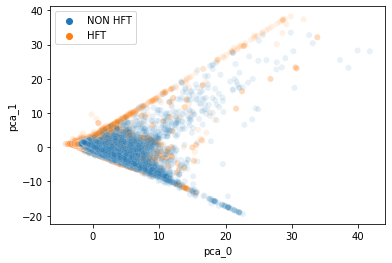

In [12]:
sns.scatterplot(
    data=x_train_scaled.loc[x_train_scaled.type != 'MIX'],
    x='pca_0',
    y='pca_1',
    alpha=.1,
    hue=x_train_scaled.loc[x_train_scaled.type != 'MIX', 'type'].to_list(),
)

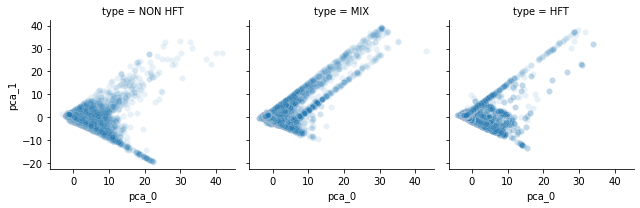

In [13]:
g = sns.FacetGrid(data=x_train_scaled, col='type')
g.map(sns.scatterplot, 'pca_0', 'pca_1', alpha=.1, )

In [14]:
g.map(sns.scatterplot, 'pca_2', 'pca_3', alpha=.1, )

In [15]:
g.map(sns.scatterplot, 'pca_4', 'pca_5', alpha=.1, )

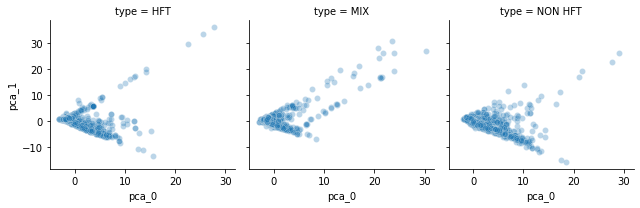

In [16]:
g = sns.FacetGrid(data=x_train_scaled.groupby('type').apply(lambda x: x.sample(n=2000)), col='type')
g.map(sns.scatterplot, 'pca_0', 'pca_1', alpha=.3, )

In [17]:
pca.explained_variance_.cumsum()

array([ 8.40843002, 14.89498496, 17.68043634, 20.14629524, 22.11914111,
       23.81026019])

In [18]:
np.array(x_train_scaled.type)

array(['NON HFT', 'NON HFT', 'NON HFT', ..., 'NON HFT', 'NON HFT',
       'NON HFT'], dtype=object)

In [19]:
onehot = OneHotEncoder(sparse=False)
onehotencoded = pd.DataFrame(
    onehot.fit_transform(np.array(x_train_scaled.type).reshape(-1, 1)),
    columns=onehot.categories_[0].tolist(),
)
x_train_scaled = x_train_scaled.reset_index().join(onehotencoded)

# Classification linéaire des lignes

In [20]:
x_train_scaled[numeric_cols].drop('Index', axis=1).fillna(0.)

,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,-0.234316,-0.127020,-0.163583,-0.056435,0.470463,-0.063888,-0.119165,-0.093944,-0.359533,0.937537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.511829
1,-0.238513,0.107288,-0.153818,-0.056435,-0.185661,-0.063888,-0.203653,-0.098566,-0.453049,-0.499046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.494769
2,-0.240071,0.415368,-0.049751,-0.056435,-0.418488,-0.063888,-0.203654,-0.098566,-0.453341,-0.654949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.420329
3,-0.238446,-0.041184,-0.145822,-0.056435,-0.119993,-0.063888,-0.202415,-0.098566,-0.447904,0.659476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.511829
4,-0.239816,0.129327,0.000000,-0.056435,-0.366792,-0.063888,-0.203654,-0.098566,-0.453677,-0.667255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.459100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,-0.242495,0.077130,0.000000,-0.056435,-0.408418,-0.063888,-0.203654,-0.098566,-0.453890,-0.600295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.513379
105778,-0.241017,0.077130,0.000000,-0.056435,-0.543385,-0.063888,-0.203654,-0.098566,-0.447101,-0.664896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507176
105779,-0.242520,0.954043,0.000000,-0.056435,-0.414046,-0.063888,-0.203654,-0.098566,-0.453792,-0.686089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.493219
105780,-0.242283,2.596516,0.000000,-0.056435,-0.478949,-0.063888,-0.203654,-0.098566,-0.453767,-0.678085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.463753


In [21]:
linear_clf = LogisticRegression(max_iter=500)
linear_clf.fit(x_train_scaled[numeric_cols].drop('Index', axis=1).fillna(0.), x_train_scaled['HFT'])

LogisticRegression(max_iter=500)

In [22]:
x_train_scaled['HFT_pred'] = linear_clf.predict(x_train_scaled[numeric_cols].drop('Index', axis=1).fillna(0.))

In [23]:
x_train_scaled.pivot_table(index='HFT', columns='HFT_pred', values='Index', aggfunc='count')

HFT_pred,0.0,1.0
HFT,,
0.0,68471,5361
1.0,13142,18808


In [24]:
x_train_scaled

,Trader,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,Share,Day,Index,...,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type,int_y,HFT,MIX,NON HFT,HFT_pred
0,Trader_10,1.265464,-0.130369,-0.583806,0.760874,-1.851411,-0.660178,Isin_8,Date_24,-1.732034,...,NaN,NaN,NaN,-0.511829,NON HFT,0,0.0,0.0,1.0,0.0
1,Trader_10,-0.416061,0.343464,-0.371015,0.124444,-0.150464,-0.300556,Isin_87,Date_29,-1.732002,...,NaN,NaN,NaN,-0.494769,NON HFT,0,0.0,0.0,1.0,0.0
2,Trader_10,-0.903777,0.797972,0.071306,0.369366,0.083659,-0.358693,Isin_87,Date_23,-1.731969,...,NaN,NaN,NaN,-0.420329,NON HFT,0,0.0,0.0,1.0,0.0
3,Trader_10,0.296157,-0.153121,-0.550448,0.300841,-0.252947,-0.825512,Isin_12,Date_11,-1.731936,...,NaN,NaN,NaN,-0.511829,NON HFT,0,0.0,0.0,1.0,0.0
4,Trader_10,0.113586,-0.119139,-0.685269,0.328906,0.130614,-0.447658,Isin_87,Date_9,-1.731903,...,NaN,NaN,NaN,-0.459100,NON HFT,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,Trader_60,0.057810,0.352975,0.717407,1.586886,1.178486,0.179898,Isin_84,Date_27,1.731903,...,NaN,NaN,NaN,-0.513379,NON HFT,0,0.0,0.0,1.0,0.0
105778,Trader_60,-1.283999,1.317273,1.031979,0.858963,0.645522,-1.142987,Isin_102,Date_18,1.731936,...,NaN,NaN,NaN,-0.507176,NON HFT,0,0.0,0.0,1.0,0.0
105779,Trader_60,3.178714,-2.088382,-0.048731,3.389301,3.036922,1.655394,Isin_12,Date_13,1.731969,...,NaN,NaN,NaN,-0.493219,NON HFT,0,0.0,0.0,1.0,0.0
105780,Trader_60,2.357271,-1.497619,0.058069,3.115482,2.770986,1.496456,Isin_27,Date_30,1.732002,...,NaN,NaN,NaN,-0.463753,NON HFT,0,0.0,0.0,1.0,0.0


### Cas le plus simple

Classification des lignes, puis on vote à la majorité. Nécessite 2 étages : 
  - classification des lignes
  - aggrégateur qui détermine ensuite la classe du trader

#### Hypothèse simplificatrice

On considère que toutes les lignes ont la classe de leur trader

In [25]:
x_train_scaled2 = x_train_scaled.drop(['Trader', 'pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'Share', 'Day', 'Index', 
    'type', 'int_y', 'HFT', 'MIX', 'NON HFT', 'HFT_pred' ], axis=1).fillna(0)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(
    x_train_scaled2,
    x_train_scaled['type'])
              

LinearDiscriminantAnalysis()

In [26]:
step_1 = lda_model.predict(x_train_scaled2)
x_train_scaled['step_1'] = step_1
preds = (
    x_train_scaled
    .groupby(['Trader', 'type', 'step_1'])
    .size()
    .unstack('step_1', fill_value=0.)
    .idxmax(axis=1)
    .rename('pred')
    .reset_index('type')
)
preds

,type,pred
Trader,,
Trader_10,NON HFT,MIX
Trader_105,NON HFT,NON HFT
Trader_107,MIX,MIX
Trader_110,NON HFT,NON HFT
Trader_114,NON HFT,NON HFT
...,...,...
Trader_51,NON HFT,NON HFT
Trader_54,NON HFT,MIX
Trader_57,NON HFT,NON HFT


In [27]:
f1_score(preds.type, preds.pred, average='micro')

0.6046511627906976

#### Essai avec un autre classifier

On tente un random forest

In [28]:
x_train_numerical = x_train.drop(['Index', 'Share', 'Day', 'Trader'], axis=1)

In [29]:
y_train_expanded = x_train.set_index('Trader').join(y_train.set_index('Trader'))['type'].reset_index()

In [30]:
x_train_numerical.fillna(0)

,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,10.722543,984.320560,23151.83800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,0.000204,8.768699,2671.48830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
2,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,0.000129,5.725427,448.88360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63
3,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,0.000945,62.444176,19187.71900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,1.517730,26.750000,0.000000,0.0,944.008551,0.000071,0.001364,0.000146,2.225420,273.45676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,1.150000,23.000000,0.000000,0.0,736.500080,0.000000,0.000188,0.000039,0.003226,1228.04750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
105778,1.352941,23.000000,0.000000,0.0,63.672695,0.000000,0.000963,0.000176,70.822190,307.08710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
105779,1.146667,86.000000,0.000000,0.0,708.440816,0.000000,0.000578,0.000062,1.023857,4.95412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
105780,1.179191,204.000000,0.000000,0.0,384.893976,0.000000,0.000536,0.000242,1.288446,119.05335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35


In [31]:
random_forest_model = RandomForestClassifier(
    max_depth=3,
    
).fit(x_train_numerical.fillna(0), y_train_expanded['type'])
step_1 = random_forest_model.predict(x_train_numerical.fillna(0))
print(len(step_1))
step_1 = pd.DataFrame(step_1, columns=['pred_step_1'])

105782


In [32]:
step_1.value_counts()

pred_step_1
MIX            59456
HFT            24251
NON HFT        22075
dtype: int64

In [33]:
f1_score(y_train_expanded.type, step_1.pred_step_1, average='micro')

0.8598910967839519

In [34]:
preds = (
    step_1
    .join(x_train)
    .groupby(['Trader', 'pred_step_1'])
    .size()
    .unstack('pred_step_1', fill_value=0.)
    .idxmax(axis=1)
    .rename('pred')
#     .reset_index('pred_step_1')
)
preds.value_counts()

NON HFT    40
MIX        39
HFT         7
Name: pred, dtype: int64

In [35]:
reordered = preds.to_frame().join(y_train.set_index('Trader'))
reordered

,pred,type
Trader,,
Trader_10,NON HFT,NON HFT
Trader_105,NON HFT,NON HFT
Trader_107,MIX,MIX
Trader_110,NON HFT,NON HFT
Trader_114,NON HFT,NON HFT
...,...,...
Trader_51,NON HFT,NON HFT
Trader_54,MIX,NON HFT
Trader_57,NON HFT,NON HFT


In [36]:
f1_score(reordered.type, reordered.pred, average='micro')

0.7441860465116278

### On en envoie un pour triper


In [37]:
test_pred = random_forest_model.predict(x_test.drop(
    ['Trader', 'Share', 'Day', 'Index', 
     ], axis=1).fillna(0))
test_pred = pd.DataFrame(test_pred, columns=['pred_step_1'])
print(len(test_pred))
test_pred.value_counts()

85304


pred_step_1
MIX            48224
HFT            20233
NON HFT        16847
dtype: int64

In [38]:
test_preds = (
    x_test
    .join(test_pred)
    .groupby(['Trader', 'pred_step_1'])
    .size()
    .unstack('pred_step_1', fill_value=0.)
    .idxmax(axis=1)
    .rename('type')
#     .reset_index('type')
)
test_preds.value_counts()

MIX        44
NON HFT    33
HFT         8
Name: type, dtype: int64

In [39]:
test_preds.to_frame().to_csv(data_path / 'out' / 'submission.csv')

### Correlation heatmap

In [40]:
merged_train = x_train.merge(y_train, on='Trader')
merged_train = merged_train.join(pd.DataFrame(
    OneHotEncoder(sparse=False).fit_transform(np.array(merged_train.type).reshape(-1, 1)),
    columns=['HFT', 'MIX', 'NON_HFT']
))
merged_train

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type,HFT,MIX,NON_HFT
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,NaN,NaN,NaN,NaN,NaN,4,NON HFT,0.0,0.0,1.0
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,NaN,NaN,NaN,NaN,NaN,15,NON HFT,0.0,0.0,1.0
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,NaN,NaN,NaN,NaN,NaN,63,NON HFT,0.0,0.0,1.0
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,NaN,NaN,NaN,NaN,NaN,4,NON HFT,0.0,0.0,1.0
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,...,NaN,NaN,NaN,NaN,NaN,38,NON HFT,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,105778,Isin_84,Date_27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,...,NaN,NaN,NaN,NaN,NaN,3,NON HFT,0.0,0.0,1.0
105778,105779,Isin_102,Date_18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,...,NaN,NaN,NaN,NaN,NaN,7,NON HFT,0.0,0.0,1.0
105779,105780,Isin_12,Date_13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,...,NaN,NaN,NaN,NaN,NaN,16,NON HFT,0.0,0.0,1.0
105780,105781,Isin_27,Date_30,Trader_60,1.179191,204.000000,NaN,0.0,384.893976,0.000000,...,NaN,NaN,NaN,NaN,NaN,35,NON HFT,0.0,0.0,1.0


<AxesSubplot:>

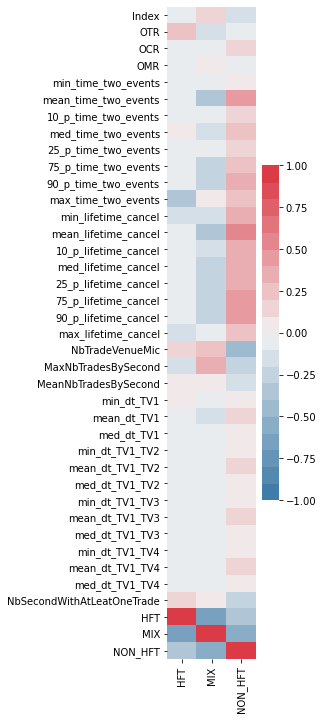

In [41]:
fig, ax = plt.subplots(figsize=(2, 12))
sns.heatmap(merged_train.corr()[['HFT', 'MIX', 'NON_HFT']], ax=ax, vmin=-1, vmax=1, cmap=sns.diverging_palette(240, 10, n=20))

<AxesSubplot:>

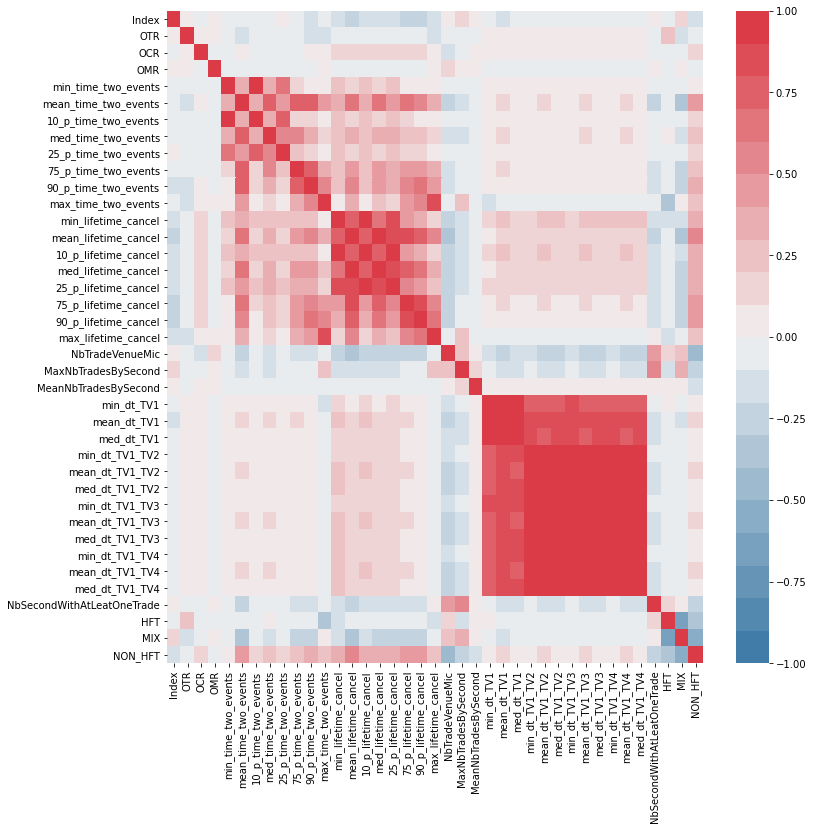

In [42]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(merged_train.corr()[:], ax=ax, vmin=-1, vmax=1, cmap=sns.diverging_palette(240, 10, n=20))

In [43]:
merged_train.corr().loc[['HFT', 'NON_HFT']].apply(lambda x: abs(x.loc['HFT'] - x.loc['NON_HFT'])).sort_values(ascending=False)

NON_HFT                       1.340466
HFT                           1.340466
NbTradeVenueMic               0.639855
mean_lifetime_cancel          0.593982
max_time_two_events           0.563018
90_p_lifetime_cancel          0.545230
75_p_lifetime_cancel          0.501094
mean_time_two_events          0.482301
min_lifetime_cancel           0.459924
90_p_time_two_events          0.446906
10_p_lifetime_cancel          0.442757
med_lifetime_cancel           0.436045
max_lifetime_cancel           0.429845
25_p_lifetime_cancel          0.422063
NbSecondWithAtLeatOneTrade    0.374843
OTR                           0.312312
75_p_time_two_events          0.261070
MeanNbTradesBySecond          0.198010
med_time_two_events           0.195651
25_p_time_two_events          0.186804
mean_dt_TV1                   0.178809
mean_dt_TV1_TV4               0.169829
mean_dt_TV1_TV2               0.163889
mean_dt_TV1_TV3               0.154301
med_dt_TV1_TV4                0.145266
med_dt_TV1_TV2           

In [44]:
with pd.option_context('display.max_rows', 300):
    display(merged_train.loc[merged_train.type != 'MIX', ['Trader', 'Share', 'OTR', 'OCR', 'OMR', 'type', 'mean_lifetime_cancel']].sample(200))

,Trader,Share,OTR,OCR,OMR,type,mean_lifetime_cancel
27625,Trader_195,Isin_104,3.586207,52.000000,NaN,NON HFT,8582.901443
54702,Trader_278,Isin_33,31.049805,2.168679,NaN,HFT,123.927996
63607,Trader_328,Isin_89,121.036220,2.041544,NaN,HFT,59.267789
60992,Trader_312,Isin_103,4.885246,27.090909,NaN,NON HFT,11993.675824
79206,Trader_386,Isin_69,85.762162,2.048019,NaN,HFT,140.582109
70917,Trader_341,Isin_1,2.384615,7.750000,31.000000,HFT,65.038902
87088,Trader_424,Isin_115,3.924242,43.166667,8.222222,NON HFT,5322.318039
17857,Trader_161,Isin_88,5.117647,3.954545,NaN,HFT,18860.660652
25333,Trader_179,Isin_5,NaN,49.500000,1.042105,NON HFT,29222.910156
56116,Trader_278,Isin_36,76.836066,2.055702,NaN,HFT,211.570158


### Autre stratégie

Je fitte un classifier uniquement sur HFT et NON HFT

In [45]:
with pd.option_context('display.max_columns', None):
    display(x_train.loc[pd.isna(x_train.OTR)])

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
3895,3896,Isin_79,Date_9,Trader_107,NaN,2.000000,NaN,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,27.972742,1,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4009,4010,Isin_107,Date_12,Trader_114,NaN,8.500000,NaN,0.000000,5207.032257,0.000000,347.921970,0.000000,15273.175000,15273.175000,15273.175000,347.921970,7810.548386,347.921970,347.921970,347.921970,15273.175000,15273.175000,15273.175000,1,2,1.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4061,4062,Isin_24,Date_23,Trader_114,NaN,23.000000,NaN,19090.314000,24480.074219,19090.314000,19090.314000,19090.314000,29869.834000,29869.834000,29869.834000,19090.314000,19090.314453,19090.314000,19090.314000,19090.314000,19090.314000,19090.314000,19090.314000,1,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4076,4077,Isin_5,Date_5,Trader_114,NaN,5.500000,NaN,106.625990,18941.175101,106.625990,24370.410000,141.703720,37481.605000,40267.836000,40267.836000,248.329710,17684.052521,248.329710,3329.665500,248.329710,26890.379000,40267.836000,40267.836000,1,2,1.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
4217,4218,Isin_1,Date_15,Trader_114,NaN,12.000000,NaN,362.273800,9994.550179,362.273800,381.962220,362.273800,392.285000,38841.680000,38841.680000,38841.680000,38841.679688,38841.680000,38841.680000,38841.680000,38841.680000,38841.680000,38841.680000,1,2,1.272727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102632,102633,Isin_6,Date_9,Trader_453,NaN,118.500000,1.017167,0.000998,1.837915,0.016589,0.049996,0.038169,2.323400,2.343184,89.698530,0.036979,215.954982,0.036979,0.036979,0.036979,431.873000,431.873000,431.873000,1,6,1.123077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
102638,102639,Isin_107,Date_26,Trader_453,NaN,4.151685,1.929504,0.000094,107.391964,1.851515,34.931404,11.392392,131.289370,272.798550,1939.910800,0.056564,338.465686,30.434610,218.149900,70.835350,405.221950,782.762500,2733.353500,1,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
102646,102647,Isin_50,Date_23,Trader_453,NaN,5.005900,1.665358,0.000062,43.941172,0.073087,15.509677,3.240783,56.388880,119.050610,535.724800,0.156201,176.023929,10.819683,115.623770,41.845085,231.174700,424.596070,1338.186200,1,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
102675,102676,Isin_50,Date_12,Trader_453,NaN,4.724036,1.734205,0.000060,47.650679,0.200218,21.131504,7.590872,62.847603,130.431300,452.485100,0.195813,177.452824,20.492762,128.417300,52.150730,235.797130,396.983580,1124.399500,1,2,1.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [46]:
x_train.isna().sum()

Index                             0
Share                             0
Day                               0
Trader                            0
OTR                            1683
OCR                               0
OMR                           47612
min_time_two_events               0
mean_time_two_events              0
10_p_time_two_events              0
med_time_two_events               0
25_p_time_two_events              0
75_p_time_two_events              0
90_p_time_two_events              0
max_time_two_events               0
min_lifetime_cancel               0
mean_lifetime_cancel              0
10_p_lifetime_cancel              0
med_lifetime_cancel               0
25_p_lifetime_cancel              0
75_p_lifetime_cancel              0
90_p_lifetime_cancel              0
max_lifetime_cancel               0
NbTradeVenueMic                   0
MaxNbTradesBySecond               0
MeanNbTradesBySecond              0
min_dt_TV1                     4235
mean_dt_TV1                 

In [47]:
columns = [
    'OTR', 'OCR', 'OMR', 'NbTradeVenueMic', 'mean_lifetime_cancel', 'max_time_two_events', 'NbSecondWithAtLeatOneTrade',    
]

In [48]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    merged_train.loc[merged_train.type != 'MIX'].fillna(0.), merged_train.loc[merged_train.type != 'MIX', 'type'],
    test_size=.3,
)

random_forest_model = RandomForestClassifier().fit(
    x_train2.loc[:, columns], y_train2)

In [49]:
f1_score(random_forest_model.predict(x_test2.loc[:, columns]), y_test2, average='micro')

0.9844076120319214

In [50]:
std_scaler = StandardScaler().fit(x_train2.loc[:, columns])

In [51]:
logistic_model = LogisticRegression().fit(
    std_scaler.transform(x_train2.loc[:, columns]), y_train2)

In [52]:
f1_score(logistic_model.predict(std_scaler.transform(x_test2.loc[:, columns])), y_test2, average='micro')

0.9001227747084101

### Passage sur les MIX

In [53]:
mix_pred = pd.DataFrame(
    random_forest_model.predict(merged_train.loc[merged_train.type == 'MIX', columns].fillna(0.)),
    columns=['pred'],
)

In [54]:
mix_pred_rates = (
    merged_train
    .loc[merged_train.type == 'MIX']
    .reset_index(drop=True)
    .join(mix_pred)
    .groupby(['Trader', 'pred']).size()
    .unstack('pred', fill_value=0)
    .assign(HFT_pred_rate=lambda x: x.HFT / x.sum(axis=1))
)
mix_pred_rates

pred,HFT,NON HFT,HFT_pred_rate
Trader,,,
Trader_107,1376,460,0.749455
Trader_140,256,326,0.439863
Trader_164,894,1406,0.388696
Trader_172,902,1560,0.366369
Trader_205,24,235,0.092664
Trader_209,3416,6792,0.334639
Trader_233,2131,228,0.903349
Trader_241,1485,1062,0.583039
Trader_245,2165,335,0.866000


In [55]:
print(sns.__version__)

0.11.1


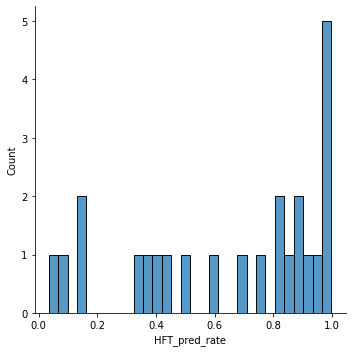

In [56]:
sns.displot(mix_pred_rates, x="HFT_pred_rate" ,bins=30)

## Et si j'y vais en mode super simple ???

In [57]:
grouped = x_train.fillna(0).groupby('Trader').mean()
grouped

,Index,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Trader,,,,,,,,,,,,,,,,,,,,,
Trader_10,39.0,2.133353,24.362271,40.002800,8.956736,2431.882764,9.332928,831.154295,31.667709,2974.318122,...,0.908392,0.908392,0.908392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.805195
Trader_105,1103.5,5.399858,39.622702,0.028081,20.388370,4710.344772,20.451175,329.882101,40.584926,4946.006166,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.258772
Trader_107,3047.5,3.659010,7.270289,81.436555,0.597774,88.883777,0.687852,16.229210,2.731964,71.448717,...,99.842986,225.389795,131.365326,109.640274,231.750392,139.187497,103.521117,233.450338,130.505139,75.371460
Trader_110,3969.5,3.508333,8.750000,0.000000,1510.086341,14886.664609,1510.086341,2909.984216,1510.086341,26757.402475,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.625000
Trader_114,5082.0,4.933919,26.304692,0.197564,251.787335,7331.947733,255.691851,1935.314730,463.869943,10727.553461,...,235.666481,756.023979,464.972719,235.666481,756.023979,464.972719,235.666481,756.023979,464.972719,105.414524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trader_51,105357.0,3.984287,14.601212,7.129144,76.184926,4396.805226,79.343803,620.547924,117.392622,6369.119719,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.265734
Trader_54,105573.5,2.885353,14.721527,9.891323,3.755166,1548.125468,3.854575,81.862178,9.818471,1820.165243,...,131.606897,320.901148,141.131034,131.606897,320.901148,141.131034,131.606897,320.901148,141.131034,10.982759
Trader_57,105731.5,2.962073,13.685897,8.221154,223.182288,4708.397280,224.589672,639.686837,227.695426,7438.155272,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.961538


In [58]:
y_train

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT
...,...,...
81,Trader_140,MIX
82,Trader_451,MIX
83,Trader_438,MIX
84,Trader_278,HFT


In [59]:
full_grouped = grouped.reset_index().merge(y_train, on='Trader')

In [60]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(
    full_grouped[columns],
    full_grouped.type,
    test_size=0.3,
    random_state=0
)


In [61]:
forest_clf = RandomForestClassifier()
forest_clf.fit(x_train3, y_train3)

RandomForestClassifier()

In [62]:
f1_score(forest_clf.predict(x_test3), y_test3, average='micro')

0.6923076923076923

In [63]:
forest_clf.fit(full_grouped[columns], full_grouped.type)

RandomForestClassifier()

Je balourde une prédiction débile

In [64]:
to_pred = x_test.fillna(0).groupby('Trader').mean()
to_pred

,Index,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Trader,,,,,,,,,,,,,,,,,,,,,
Adelaide,5.5,1.384594,25.650000,1.800000,2.026000e-04,40.031248,0.000218,0.001789,0.000356,23.772885,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000
Alana,29.0,3.717499,50.146260,8.439564,2.138264e+02,6642.866960,213.826401,1851.489926,726.763544,9082.145203,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.540541
Alcmene,71.5,1.960590,9.562500,0.000000,3.878636e+03,10675.070452,3878.636358,4966.611609,3912.782193,16404.682002,...,728.067110,900.465325,728.748842,728.067110,900.465325,728.748842,728.067110,900.465325,728.748842,45.812500
Alice,1144.0,55.511168,2.094555,0.000000,2.484502e-07,107.664516,0.112270,8.548595,0.836130,1824.310909,...,6.813389,106.297384,13.892632,5.737494,97.043045,13.821533,18.109029,109.822673,25.851919,475.942299
Alices Sister,2284.0,2.739913,14.491364,7.121451,1.569779e+02,1762.724624,157.368960,256.485343,163.055533,2325.105273,...,67.349727,145.539617,73.229508,67.349727,145.539617,73.229508,67.349727,145.539617,73.229508,7.584699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Monstro,80560.5,1.433437,52.500000,0.000000,5.250000e-06,18.184575,0.000010,0.107259,0.000282,11.253734,...,0.019000,154.946552,28.334250,0.019000,95.415275,19.340000,0.019000,116.587478,23.876750,78.750000
Morgana,80749.5,3.067717,49.426917,18.507917,3.119828e+00,3687.206446,7.998729,1347.570821,123.150971,5532.802026,...,111.737922,386.941294,176.484848,86.697759,512.879149,228.032195,99.379717,478.806926,225.474471,143.919786
The Doorknob,81012.5,6.546354,6.571184,126.502771,7.809037e-01,16.044565,0.821257,2.887167,1.080643,12.852131,...,333.502370,919.300726,343.098552,343.202774,1012.926654,357.541838,343.202774,1014.910788,357.541333,44.664474


In [65]:
pred = forest_clf.predict(to_pred[columns])
pred

array(['NON HFT', 'NON HFT', 'NON HFT', 'HFT', 'NON HFT', 'NON HFT',
       'MIX', 'NON HFT', 'NON HFT', 'MIX', 'MIX', 'MIX', 'NON HFT', 'MIX',
       'NON HFT', 'NON HFT', 'HFT', 'NON HFT', 'MIX', 'MIX', 'NON HFT',
       'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT',
       'NON HFT', 'HFT', 'NON HFT', 'HFT', 'NON HFT', 'MIX', 'NON HFT',
       'NON HFT', 'MIX', 'NON HFT', 'NON HFT', 'MIX', 'HFT', 'HFT',
       'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'MIX',
       'MIX', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'HFT',
       'NON HFT', 'MIX', 'MIX', 'MIX', 'MIX', 'NON HFT', 'HFT', 'NON HFT',
       'HFT', 'MIX', 'NON HFT', 'NON HFT', 'NON HFT', 'HFT', 'NON HFT',
       'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'MIX', 'MIX', 'HFT',
       'NON HFT', 'MIX', 'NON HFT', 'NON HFT', 'NON HFT', 'MIX', 'MIX',
       'HFT', 'HFT', 'MIX'], dtype=object)

In [66]:
to_pred.index

Index(['Adelaide', 'Alana', 'Alcmene', 'Alice', 'Alices Sister',
       'Angel (Experiment 624)', 'Annette', 'Armoire', 'Arthur/Wart', 'Axe',
       'Baby Red Bird', 'Backwoods Beagle', 'Bacon Beagle', 'Baileywick',
       'Bat Queen', 'Becky', 'Bent-Tail the Coyote', 'Big Al', 'Big Mama',
       'Bill Green', 'Black Bart', 'Bobble', 'Bomber Beagle', 'Bookseller',
       'Boomer', 'Bowler Hat Guy', 'Braddock', 'Brer Bear', 'Brudo Avarius',
       'Bruno the Dog', 'Buck Leatherleaf', 'Bucky Oryx-Antlerson',
       'Butch the Bulldog', 'Butcher Boy', 'Dallben', 'Danny',
       'Dennis Avarius', 'Digger the Mole', 'Dijon the Thief', 'Don Karnage',
       'Donald Duck', 'Doug Dalmatian', 'Dr. Delbert Doppler', 'Dr. Facilier',
       'Dr. Joshua Sweet', 'Dr. Teeth', 'Duchess', 'Duke of Weselton',
       'Dylan Dalmatian', 'Edric Blight', 'Elliott', 'Emperor Belos',
       'Evinrude', 'Fairy Mary', 'Fidget', 'Flash', 'Flora', 'Flounder',
       'Flunkey the Baboon', 'Francis', 'Friend Owl', 

In [67]:
pd.DataFrame(
    pred,
    index=to_pred.index,
    columns=['type'],
).to_csv(data_path / 'out' / 'submission2.csv')

### Faire une cross validation

In [68]:
x_train = pd.read_csv(data_path / filenames['x_train'])
y_train = pd.read_csv(data_path / filenames['y_train'])
x_test = pd.read_csv(data_path / filenames['x_test'])

In [69]:
folder = StratifiedKFold(n_splits=3)

In [70]:
y_train

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT
...,...,...
81,Trader_140,MIX
82,Trader_451,MIX
83,Trader_438,MIX
84,Trader_278,HFT


In [71]:
folder.split(y_train.Trader, y_train.type)

<generator object _BaseKFold.split at 0x7f6b9d6a3190>

In [72]:
for train_index, test_index in folder.split(y_train.Trader, y_train.type):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(' '.join(y_train.Trader.iloc[test_index]))
    print(' '.join(y_train.type.iloc[test_index]))
    print(y_train.type.iloc[train_index].value_counts())
#     print(y_train.loc[train_index, 'Trader'], y_train.loc[train_index, 'type'])

TRAIN: [19 20 22 26 27 29 31 33 34 35 36 37 38 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 21 23 24 25 28
 30 32 39 46 47]
Trader_285 Trader_114 Trader_110 Trader_57 Trader_128 Trader_328 Trader_59 Trader_435 Trader_293 Trader_245 Trader_280 Trader_158 Trader_60 Trader_179 Trader_208 Trader_222 Trader_237 Trader_256 Trader_184 Trader_26 Trader_205 Trader_395 Trader_358 Trader_164 Trader_386 Trader_430 Trader_120 Trader_132 Trader_136
MIX NON HFT NON HFT NON HFT NON HFT HFT NON HFT NON HFT NON HFT MIX NON HFT NON HFT NON HFT NON HFT NON HFT NON HFT NON HFT NON HFT NON HFT MIX MIX MIX MIX MIX HFT MIX HFT HFT HFT
NON HFT    31
MIX        16
HFT        10
Name: type, dtype: int64
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 21 23 24 25 28
 30 32 39 44 45 46 47 49 54 56 57 58 60 62 65 68 69 70 71 72 73 74 75 76
 77 78 

In [73]:
x_train

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,105778,Isin_84,Date_27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
105778,105779,Isin_102,Date_18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
105779,105780,Isin_12,Date_13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
105780,105781,Isin_27,Date_30,Trader_60,1.179191,204.000000,NaN,0.0,384.893976,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35


In [74]:
def custom_folder(x, y):
    kfolder = StratifiedKFold(n_splits=3)
    for _, test_index in folder.split(y.Trader, y.type):
        train_traders = y.loc[train_index, 'Trader']
        test_traders = y.loc[test_index, 'Trader']
        print('break')
        print(' '.join(train_traders))
        print(y.loc[y.Trader.isin(test_traders), 'type'].value_counts())
        
        yield train_index, test_index

In [75]:
for train_index, test_index in custom_folder(x_train, y_train):
    pass

break
Trader_285 Trader_114 Trader_110 Trader_57 Trader_128 Trader_328 Trader_59 Trader_435 Trader_293 Trader_245 Trader_280 Trader_158 Trader_60 Trader_179 Trader_208 Trader_222 Trader_237 Trader_256 Trader_184 Trader_398 Trader_425 Trader_26 Trader_424 Trader_205 Trader_395 Trader_358 Trader_169 Trader_54 Trader_164 Trader_46 Trader_386 Trader_177 Trader_430 Trader_16 Trader_221 Trader_279 Trader_127 Trader_442 Trader_446 Trader_120 Trader_38 Trader_255 Trader_41 Trader_10 Trader_132 Trader_136 Trader_453 Trader_338 Trader_233 Trader_431 Trader_329 Trader_310 Trader_172 Trader_226 Trader_40 Trader_241 Trader_161 Trader_385
NON HFT    16
MIX         8
HFT         5
Name: type, dtype: int64
break
Trader_285 Trader_114 Trader_110 Trader_57 Trader_128 Trader_328 Trader_59 Trader_435 Trader_293 Trader_245 Trader_280 Trader_158 Trader_60 Trader_179 Trader_208 Trader_222 Trader_237 Trader_256 Trader_184 Trader_398 Trader_425 Trader_26 Trader_424 Trader_205 Trader_395 Trader_358 Trader_169 T

Je dois plutôt faire un pipeline qui se base uniquement sur une liste d'index.

In [76]:
all_x = pd.concat([x_train, x_test], axis=0)

In [77]:
def get_X_from_indices(indices, X=all_x, y=y_train):
    try:
        return(X.loc[X['Trader'].isin(y.Trader.iloc[indices])])
    except ValueError:
        return(X.loc[X['Trader'].isin(indices)])

In [78]:
getX = FunctionTransformer(get_X_from_indices)

In [79]:
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline

In [80]:
all_x.select_dtypes(include=np.number).columns

Index(['Index', 'OTR', 'OCR', 'OMR', 'min_time_two_events',
       'mean_time_two_events', '10_p_time_two_events', 'med_time_two_events',
       '25_p_time_two_events', '75_p_time_two_events', '90_p_time_two_events',
       'max_time_two_events', 'min_lifetime_cancel', 'mean_lifetime_cancel',
       '10_p_lifetime_cancel', 'med_lifetime_cancel', '25_p_lifetime_cancel',
       '75_p_lifetime_cancel', '90_p_lifetime_cancel', 'max_lifetime_cancel',
       'NbTradeVenueMic', 'MaxNbTradesBySecond', 'MeanNbTradesBySecond',
       'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1', 'min_dt_TV1_TV2',
       'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3',
       'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4',
       'mean_dt_TV1_TV4', 'med_dt_TV1_TV4', 'NbSecondWithAtLeatOneTrade'],
      dtype='object')

In [81]:
columns = [
    'OTR', 'OCR', 'OMR', 'NbTradeVenueMic', 'mean_lifetime_cancel', 'max_time_two_events', 'NbSecondWithAtLeatOneTrade',    
]

In [82]:
def select_and_fillna(X, val=0., cols=columns):
    return(X[cols].fillna(val))
select_and_fill_na = FunctionTransformer(select_and_fillna)

In [83]:
def select_cols(X, cols=None):
    if not cols:
        return(X)
    else:
        return(X[cols])
column_selector = FunctionTransformer(select_cols, kw_args=dict(cols=columns + ['Trader']))

In [84]:
# column_selector = ColumnTransformer(
#     [
#         ('col_selector', 'passthrough', columns + ['Trader']),   # all_x.select_dtypes(include=np.number).columns
#     ]
# )
# fill_na_transformer = ColumnTransformer(
#     [
#         ('fill_na', fill_na, make_column_selector(dtype_include=np.number))
#     ]
# )    

In [85]:
x_train.groupby('Trader').mean()

,Index,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Trader,,,,,,,,,,,,,,,,,,,,,
Trader_10,39.0,2.133353,24.362271,55.003849,8.956736,2431.882764,9.332928,831.154295,31.667709,2974.318122,...,69.946217,69.946217,69.946217,NaN,NaN,NaN,NaN,NaN,NaN,16.805195
Trader_105,1103.5,5.399858,39.622702,1.371978,20.388370,4710.344772,20.451175,329.882101,40.584926,4946.006166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.258772
Trader_107,3047.5,3.661004,7.270289,292.026396,0.597774,88.883777,0.687852,16.229210,2.731964,71.448717,...,192.352279,434.224201,253.081572,215.063614,454.587308,273.021629,203.060652,457.921816,255.990849,75.371460
Trader_110,3969.5,3.508333,8.750000,NaN,1510.086341,14886.664609,1510.086341,2909.984216,1510.086341,26757.402475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625000
Trader_114,5082.0,4.987915,26.304692,219.000000,251.787335,7331.947733,255.691851,1935.314730,463.869943,10727.553461,...,249.271273,799.668493,491.815132,249.271273,799.668493,491.815132,249.271273,799.668493,491.815132,105.414524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trader_51,105357.0,3.984287,14.601212,14.992171,76.184926,4396.805226,79.343803,620.547924,117.392622,6369.119719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.265734
Trader_54,105573.5,2.895337,14.721527,11.902422,3.755166,1548.125468,3.854575,81.862178,9.818471,1820.165243,...,848.133333,2068.029621,909.511111,848.133333,2068.029621,909.511111,848.133333,2068.029621,909.511111,10.982759
Trader_57,105731.5,2.962073,13.685897,17.812500,223.182288,4708.397280,224.589672,639.686837,227.695426,7438.155272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.961538


In [86]:
def aggregate(X):
    return(X.groupby('Trader').mean().fillna(0.))
aggregator = FunctionTransformer(aggregate)

In [87]:
pipe = make_pipeline(getX, column_selector, aggregator, RandomForestClassifier())

In [88]:
pipe.fit([0, 1, 2, 3], y=y_train.loc[[0, 1, 2, 3], 'type'])

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function get_X_from_indices at 0x7f6b8f5f8d30>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function select_cols at 0x7f6b9e0ff040>,
                                     kw_args={'cols': ['OTR', 'OCR', 'OMR',
                                                       'NbTradeVenueMic',
                                                       'mean_lifetime_cancel',
                                                       'max_time_two_events',
                                                       'NbSecondWithAtLeatOneTrade',
                                                       'Trader']})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function aggregate at 0x7f6b9d68f3a0>)),
                ('randomforestclassifier', RandomForestClassifier())])

In [89]:
pipe.predict(np.array([4, 5]))

array(['NON HFT', 'NON HFT'], dtype=object)

In [90]:
train_, test_ = train_test_split(y_train.index, test_size=.5)

In [91]:
pipe.fit(train_, y_train.type.iloc[train_])

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function get_X_from_indices at 0x7f6b8f5f8d30>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function select_cols at 0x7f6b9e0ff040>,
                                     kw_args={'cols': ['OTR', 'OCR', 'OMR',
                                                       'NbTradeVenueMic',
                                                       'mean_lifetime_cancel',
                                                       'max_time_two_events',
                                                       'NbSecondWithAtLeatOneTrade',
                                                       'Trader']})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function aggregate at 0x7f6b9d68f3a0>)),
                ('randomforestclassifier', RandomForestClassifier())])

In [92]:
f1_score(pipe.predict(test_), y_train.type.iloc[test_], average='micro')

0.5581395348837209

In [93]:
cross_val_score(pipe, y_train.index, y_train.type, cv=4, scoring='f1_micro')

array([0.5       , 0.63636364, 0.47619048, 0.47619048])

In [94]:
pipe.fit(y_train.index, y_train.type)

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function get_X_from_indices at 0x7f6b8f5f8d30>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function select_cols at 0x7f6b9e0ff040>,
                                     kw_args={'cols': ['OTR', 'OCR', 'OMR',
                                                       'NbTradeVenueMic',
                                                       'mean_lifetime_cancel',
                                                       'max_time_two_events',
                                                       'NbSecondWithAtLeatOneTrade',
                                                       'Trader']})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function aggregate at 0x7f6b9d68f3a0>)),
                ('randomforestclassifier', RandomForestClassifier())])

In [95]:
result = np.vstack([x_test.Trader.unique(), pipe.predict(x_test.Trader.unique())]).T
result

array([['Adelaide', 'MIX'],
       ['Alana', 'NON HFT'],
       ['Alcmene', 'HFT'],
       ['Alice', 'MIX'],
       ['Alices Sister', 'MIX'],
       ['Angel (Experiment 624)', 'HFT'],
       ['Annette', 'NON HFT'],
       ['Armoire', 'NON HFT'],
       ['Arthur/Wart', 'MIX'],
       ['Axe', 'NON HFT'],
       ['Baby Red Bird', 'NON HFT'],
       ['Backwoods Beagle', 'NON HFT'],
       ['Bacon Beagle', 'NON HFT'],
       ['Baileywick', 'NON HFT'],
       ['Bat Queen', 'NON HFT'],
       ['Becky', 'NON HFT'],
       ['Bent-Tail the Coyote', 'HFT'],
       ['Big Al', 'NON HFT'],
       ['Big Mama', 'NON HFT'],
       ['Bill Green', 'MIX'],
       ['Black Bart', 'NON HFT'],
       ['Bobble', 'NON HFT'],
       ['Bomber Beagle', 'MIX'],
       ['Bookseller', 'NON HFT'],
       ['Boomer', 'NON HFT'],
       ['Bowler Hat Guy', 'NON HFT'],
       ['Braddock', 'NON HFT'],
       ['Brer Bear', 'HFT'],
       ['Brudo Avarius', 'NON HFT'],
       ['Bruno the Dog', 'NON HFT'],
       ['Buck Leather

In [96]:
pd.DataFrame(result, columns=['Trader', 'type']).set_index('Trader').to_csv(data_path / 'out' / 'submission3.csv')

In [97]:
sub3 = pd.DataFrame(result, columns=['Trader', 'type']).set_index('Trader')
sub3

,type
Trader,
Adelaide,MIX
Alana,NON HFT
Alcmene,HFT
Alice,MIX
Alices Sister,MIX
...,...
Monstro,MIX
Morgana,NON HFT
The Doorknob,NON HFT


In [98]:
sub2 = pd.DataFrame(
    pred,
    index=to_pred.index,
    columns=['type'],
)
sub2

,type
Trader,
Adelaide,NON HFT
Alana,NON HFT
Alcmene,NON HFT
Alice,HFT
Alices Sister,NON HFT
...,...
Monstro,MIX
Morgana,MIX
The Doorknob,HFT


In [99]:
with pd.option_context('display.max_rows', None):
    display(sub3.join(sub2, lsuffix='_3', rsuffix='_2'))

,type_3,type_2
Trader,,
Adelaide,MIX,NON HFT
Alana,NON HFT,NON HFT
Alcmene,HFT,NON HFT
Alice,MIX,HFT
Alices Sister,MIX,NON HFT
Angel (Experiment 624),HFT,NON HFT
Annette,NON HFT,MIX
Armoire,NON HFT,NON HFT
Arthur/Wart,MIX,NON HFT


In [100]:
x_test.Trader.unique()

array(['Adelaide', 'Alana', 'Alcmene', 'Alice', 'Alices Sister',
       'Angel (Experiment 624)', 'Annette', 'Armoire', 'Arthur/Wart',
       'Axe', 'Baby Red Bird', 'Backwoods Beagle', 'Bacon Beagle',
       'Baileywick', 'Bat Queen', 'Becky', 'Bent-Tail the Coyote',
       'Big Al', 'Big Mama', 'Bill Green', 'Black Bart', 'Bobble',
       'Bomber Beagle', 'Bookseller', 'Boomer', 'Bowler Hat Guy',
       'Braddock', 'Brer Bear', 'Brudo Avarius', 'Bruno the Dog',
       'Buck Leatherleaf', 'Bucky Oryx-Antlerson', 'Butch the Bulldog',
       'Butcher Boy', 'Dallben', 'Danny', 'Dennis Avarius',
       'Digger the Mole', 'Dijon the Thief', 'Don Karnage', 'Donald Duck',
       'Doug Dalmatian', 'Dr. Delbert Doppler', 'Dr. Facilier',
       'Dr. Joshua Sweet', 'Dr. Teeth', 'Duchess', 'Duke of Weselton',
       'Dylan Dalmatian', 'Edric Blight', 'Elliott', 'Emperor Belos',
       'Evinrude', 'Fairy Mary', 'Fidget', 'Flash', 'Flora', 'Flounder',
       'Flunkey the Baboon', 'Francis', 'Friend

In [101]:
pipe[0:3].transform(x_test.Trader.unique())

,OTR,OCR,OMR,NbTradeVenueMic,mean_lifetime_cancel,max_time_two_events,NbSecondWithAtLeatOneTrade
Trader,,,,,,,
Adelaide,1.384594,25.650000,18.000000,1.000000,229.448817,322.540292,4.900000
Alana,3.717499,50.146260,10.767720,1.000000,18023.320178,34200.728943,20.540541
Alcmene,2.851768,9.562500,0.000000,1.562500,16525.469547,17622.613378,45.812500
Alice,55.564162,2.094555,0.000000,6.995231,109.946313,22065.246332,475.942299
Alices Sister,2.754967,14.491364,9.512595,1.142077,5651.365232,9461.397849,7.584699
...,...,...,...,...,...,...,...
Monstro,1.433437,52.500000,0.000000,10.250000,174.522687,227.489119,78.750000
Morgana,3.075941,49.426917,28.252901,7.304813,850.959785,19519.880445,143.919786
The Doorknob,6.633639,6.571184,369.777331,1.835526,29.354461,369.374195,44.664474


In [102]:
with pd.option_context('display.max_rows', None):
    display(to_pred[columns].join(pipe[0:3].transform(x_test.Trader.unique()), lsuffix='_2', rsuffix='_3').sort_index(axis=1))

,NbSecondWithAtLeatOneTrade_2,NbSecondWithAtLeatOneTrade_3,NbTradeVenueMic_2,NbTradeVenueMic_3,OCR_2,OCR_3,OMR_2,OMR_3,OTR_2,OTR_3,max_time_two_events_2,max_time_two_events_3,mean_lifetime_cancel_2,mean_lifetime_cancel_3
Trader,,,,,,,,,,,,,,
Adelaide,4.900000,4.900000,1.000000,1.000000,25.650000,25.650000,1.800000,18.000000,1.384594,1.384594,322.540292,322.540292,229.448817,229.448817
Alana,20.540541,20.540541,1.000000,1.000000,50.146260,50.146260,8.439564,10.767720,3.717499,3.717499,34200.728943,34200.728943,18023.320178,18023.320178
Alcmene,45.812500,45.812500,1.562500,1.562500,9.562500,9.562500,0.000000,0.000000,1.960590,2.851768,17622.613378,17622.613378,16525.469547,16525.469547
Alice,475.942299,475.942299,6.995231,6.995231,2.094555,2.094555,0.000000,0.000000,55.511168,55.564162,22065.246332,22065.246332,109.946313,109.946313
Alices Sister,7.584699,7.584699,1.142077,1.142077,14.491364,14.491364,7.121451,9.512595,2.739913,2.754967,9461.397849,9461.397849,5651.365232,5651.365232
Angel (Experiment 624),11.642857,11.642857,1.428571,1.428571,5.590476,5.590476,0.000000,0.000000,4.631571,4.987845,18819.281236,18819.281236,8649.705768,8649.705768
Annette,62.525253,62.525253,4.535354,4.535354,35.677484,35.677484,14.307379,16.862268,3.800698,3.800698,2170.323056,2170.323056,447.732190,447.732190
Armoire,5.865031,5.865031,1.269939,1.269939,73.412442,73.412442,18.659509,190.093750,2.597012,2.597012,8099.744819,8099.744819,2005.963196,2005.963196
Arthur/Wart,7.800000,7.800000,1.022222,1.022222,27.381667,27.381667,6.319761,11.375570,2.104125,2.104125,200.282346,200.282346,111.601828,111.601828


In [103]:
pipe[-1].predict(pipe[:-1].transform(x_test.Trader.unique()))

array(['MIX', 'NON HFT', 'HFT', 'MIX', 'MIX', 'HFT', 'NON HFT', 'NON HFT',
       'MIX', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT',
       'NON HFT', 'NON HFT', 'HFT', 'NON HFT', 'NON HFT', 'MIX',
       'NON HFT', 'NON HFT', 'MIX', 'NON HFT', 'NON HFT', 'NON HFT',
       'NON HFT', 'HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT',
       'MIX', 'MIX', 'HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'MIX',
       'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'MIX',
       'MIX', 'MIX', 'NON HFT', 'NON HFT', 'MIX', 'MIX', 'NON HFT', 'MIX',
       'MIX', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'MIX', 'HFT',
       'NON HFT', 'NON HFT', 'HFT', 'MIX', 'NON HFT', 'NON HFT', 'HFT',
       'NON HFT', 'NON HFT', 'MIX', 'NON HFT', 'HFT', 'NON HFT', 'MIX',
       'HFT', 'HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'MIX',
       'NON HFT', 'NON HFT', 'MIX', 'NON HFT'], dtype=object)

In [104]:
pipe[-1].predict(to_pred[columns])

array(['MIX', 'NON HFT', 'HFT', 'MIX', 'MIX', 'HFT', 'NON HFT', 'NON HFT',
       'MIX', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT',
       'NON HFT', 'NON HFT', 'HFT', 'NON HFT', 'NON HFT', 'MIX',
       'NON HFT', 'NON HFT', 'MIX', 'NON HFT', 'NON HFT', 'NON HFT',
       'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT',
       'MIX', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT',
       'MIX', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT',
       'MIX', 'MIX', 'MIX', 'NON HFT', 'NON HFT', 'MIX', 'MIX', 'NON HFT',
       'MIX', 'MIX', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'MIX',
       'HFT', 'NON HFT', 'NON HFT', 'HFT', 'HFT', 'NON HFT', 'NON HFT',
       'HFT', 'NON HFT', 'NON HFT', 'MIX', 'NON HFT', 'HFT', 'NON HFT',
       'MIX', 'HFT', 'HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT',
       'MIX', 'NON HFT', 'NON HFT', 'MIX', 'NON HFT'], dtype=object)

In [105]:
pd.DataFrame(
    np.vstack([x_test.Trader.unique(), pipe[-1].predict(to_pred[columns])]).T,
    columns=['Trader', 'type']
).set_index('Trader').join(sub2, lsuffix='_~3', rsuffix='_2')

,type_~3,type_2
Trader,,
Adelaide,MIX,NON HFT
Alana,NON HFT,NON HFT
Alcmene,HFT,NON HFT
Alice,MIX,HFT
Alices Sister,MIX,NON HFT
...,...,...
Monstro,MIX,MIX
Morgana,NON HFT,MIX
The Doorknob,NON HFT,HFT


In [106]:
x_train

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,105778,Isin_84,Date_27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
105778,105779,Isin_102,Date_18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
105779,105780,Isin_12,Date_13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
105780,105781,Isin_27,Date_30,Trader_60,1.179191,204.000000,NaN,0.0,384.893976,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35


In [107]:
x_train.Trader.unique()

array(['Trader_10', 'Trader_105', 'Trader_107', 'Trader_110',
       'Trader_114', 'Trader_120', 'Trader_127', 'Trader_128',
       'Trader_132', 'Trader_136', 'Trader_140', 'Trader_149',
       'Trader_150', 'Trader_155', 'Trader_158', 'Trader_16',
       'Trader_161', 'Trader_164', 'Trader_169', 'Trader_172',
       'Trader_177', 'Trader_178', 'Trader_179', 'Trader_184',
       'Trader_191', 'Trader_195', 'Trader_205', 'Trader_208',
       'Trader_209', 'Trader_221', 'Trader_222', 'Trader_226',
       'Trader_233', 'Trader_237', 'Trader_241', 'Trader_244',
       'Trader_245', 'Trader_255', 'Trader_256', 'Trader_257',
       'Trader_26', 'Trader_264', 'Trader_275', 'Trader_278',
       'Trader_279', 'Trader_280', 'Trader_285', 'Trader_288',
       'Trader_293', 'Trader_310', 'Trader_312', 'Trader_328',
       'Trader_329', 'Trader_330', 'Trader_338', 'Trader_340',
       'Trader_341', 'Trader_35', 'Trader_358', 'Trader_375', 'Trader_38',
       'Trader_380', 'Trader_385', 'Trader_386

In [108]:
y_train.set_index('Trader').reindex(x_train.Trader.unique())

,type
Trader,
Trader_10,NON HFT
Trader_105,NON HFT
Trader_107,MIX
Trader_110,NON HFT
Trader_114,NON HFT
...,...
Trader_51,NON HFT
Trader_54,NON HFT
Trader_57,NON HFT


In [109]:
np.array(y_train.set_index('Trader').reindex(x_train.Trader.unique())).ravel()

array(['NON HFT', 'NON HFT', 'MIX', 'NON HFT', 'NON HFT', 'HFT',
       'NON HFT', 'NON HFT', 'HFT', 'HFT', 'MIX', 'NON HFT', 'NON HFT',
       'NON HFT', 'NON HFT', 'NON HFT', 'HFT', 'MIX', 'NON HFT', 'MIX',
       'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT', 'NON HFT',
       'MIX', 'NON HFT', 'MIX', 'NON HFT', 'NON HFT', 'HFT', 'MIX',
       'NON HFT', 'MIX', 'HFT', 'MIX', 'NON HFT', 'NON HFT', 'NON HFT',
       'MIX', 'MIX', 'NON HFT', 'HFT', 'NON HFT', 'NON HFT', 'MIX',
       'NON HFT', 'NON HFT', 'MIX', 'NON HFT', 'HFT', 'MIX', 'MIX', 'MIX',
       'NON HFT', 'HFT', 'HFT', 'MIX', 'NON HFT', 'MIX', 'NON HFT', 'HFT',
       'HFT', 'MIX', 'NON HFT', 'HFT', 'NON HFT', 'HFT', 'NON HFT',
       'NON HFT', 'MIX', 'MIX', 'NON HFT', 'MIX', 'NON HFT', 'NON HFT',
       'MIX', 'HFT', 'NON HFT', 'MIX', 'NON HFT', 'NON HFT', 'NON HFT',
       'NON HFT', 'NON HFT'], dtype=object)

In [110]:
pipe.fit(x_train.Trader.unique(), np.array(y_train.set_index('Trader').reindex(x_train.Trader.unique())).ravel())

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function get_X_from_indices at 0x7f6b8f5f8d30>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function select_cols at 0x7f6b9e0ff040>,
                                     kw_args={'cols': ['OTR', 'OCR', 'OMR',
                                                       'NbTradeVenueMic',
                                                       'mean_lifetime_cancel',
                                                       'max_time_two_events',
                                                       'NbSecondWithAtLeatOneTrade',
                                                       'Trader']})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function aggregate at 0x7f6b9d68f3a0>)),
                ('randomforestclassifier', RandomForestClassifier())])

In [111]:
sub2

,type
Trader,
Adelaide,NON HFT
Alana,NON HFT
Alcmene,NON HFT
Alice,HFT
Alices Sister,NON HFT
...,...
Monstro,MIX
Morgana,MIX
The Doorknob,HFT


In [112]:
pd.DataFrame(
    np.vstack([x_test.Trader.unique(), pipe.predict(x_test.Trader.unique())]).T,
    columns=['Trader', 'type'],
).set_index('Trader').join(sub2, rsuffix='_r')

,type,type_r
Trader,,
Adelaide,NON HFT,NON HFT
Alana,NON HFT,NON HFT
Alcmene,NON HFT,NON HFT
Alice,HFT,HFT
Alices Sister,NON HFT,NON HFT
...,...,...
Monstro,HFT,MIX
Morgana,MIX,MIX
The Doorknob,HFT,HFT


C'est toujours pas ça... Je comprends pas pourquoi j'ai un tel écart entre les prédictions... Il doit y avoir un petit truc qui m'échappe dans la manière de constituer le tableau de sortie...

==> OK vu, en fait c'était un problème d'ordre des samples pdt l'entrainement...

In [113]:
pipe

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function get_X_from_indices at 0x7f6b8f5f8d30>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function select_cols at 0x7f6b9e0ff040>,
                                     kw_args={'cols': ['OTR', 'OCR', 'OMR',
                                                       'NbTradeVenueMic',
                                                       'mean_lifetime_cancel',
                                                       'max_time_two_events',
                                                       'NbSecondWithAtLeatOneTrade',
                                                       'Trader']})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function aggregate at 0x7f6b9d68f3a0>)),
                ('randomforestclassifier', RandomForestClassifier())])